# Chapter 4 Hypothesis testing

## Example 4.3 Two samples

Test the difference of two means. The box-plot is not helpful.

ans =
  Columns 1 through 7
    0.5377    1.8339   -2.2588    0.8622    0.3188   -1.3077   -0.4336
  Columns 8 through 14
    0.3426    3.5784    2.7694   -1.3499    3.0349    0.7254   -0.0631
  Columns 15 through 21
    0.7147   -0.2050   -0.1241    1.4897    1.4090    1.4172    0.6715
  Columns 22 through 26
   -1.2075    0.7172    1.6302    0.4889    1.0347
ans =
  Columns 1 through 7
    1.0815    0.2572    0.7351   -0.1298    1.2107   -0.4177   -0.3551
  Columns 8 through 14
   -0.1476   -1.8554    1.6507    0.7602   -0.1039    1.5962   -0.8692
  Column 15
    0.4182
grp =
  Columns 1 through 13
     1     1     1     1     1     1     1     1     1     1     1     1     1
  Columns 14 through 26
     1     1     1     1     1     1     1     1     1     1     1     1     1
  Columns 27 through 39
     2     2     2     2     2     2     2     2     2     2     2     2     2
  Columns 40 through 41
     2     2


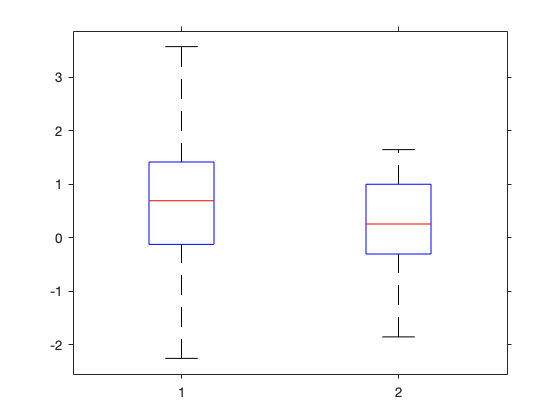

In [1]:
rng = 123;
x = normrnd(0, 1, [26,1]);
y = normrnd(0.5, 0.8, [15,1]);
x'
y'

grp = [ones(1, 26), ones(1, 15)*2];
grp
boxplot([x;y], grp)

### Example 4.11 Binomial Test
Power function $p \mapsto P_p(X \ge 59)$.

In [2]:
pow_bin = @(p) 1 - binocdf(59, 100, p)

pow_bin =
  function_handle with value:
    @(p)1-binocdf(59,100,p)


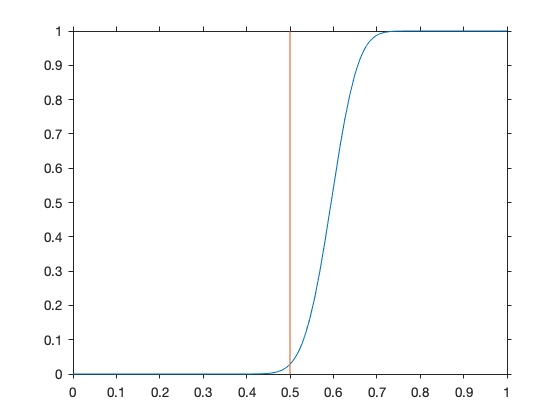

In [3]:
fplot(pow_bin, [0,1])
vline(0.5, '-')

### Figure 4.4 
The function $x \mapsto P_{0.5}(X\ge x)$ for $X \sim Bin(100, 0.5)$.

In [4]:
bino = @(x)  1 - binocdf(x, 100, 0.5);

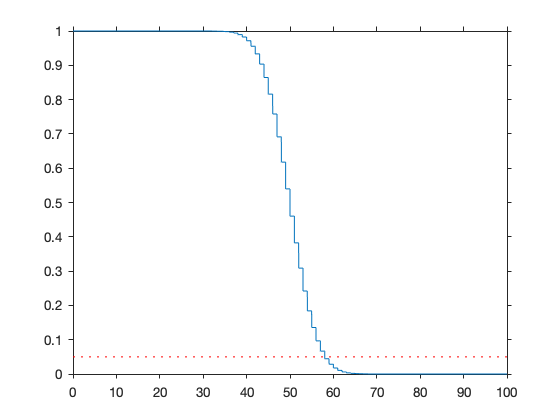

In [5]:
fplot(bino, [0, 100])

hline(0.05)

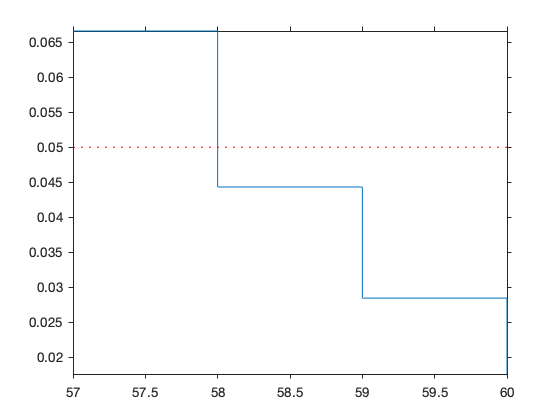

In [6]:
fplot(bino, [57, 60])

hline(0.05)

### Figure 4.5 Power function for the Gauss test
- Red. One sided test $H_0: \mu \le 0$ vs $H_1: \mu > 0$
- Blue. One sided test $H_0: \mu \ge 0$ vs $H_1: \mu < 0$
- Yellow. Two-sided test $H_0 \mu = \mu_0$ vs $H_1: \mu \ne \mu_0$

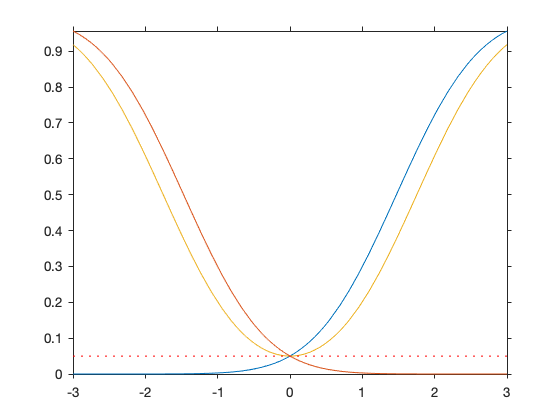

In [7]:
n = 5;
a0 = 0.05;
mu0 = 0;
sigma = 2;
pow_gauss_R = @(mu) 1 - normcdf(norminv(1-a0,0,1) + sqrt(n) .* (mu0 - mu) ./ sigma);
fplot(pow_gauss_R, [-3,3])

hold on

pow_gauss_L = @(mu) normcdf(-norminv(1-a0,0,1) + sqrt(n) .* (mu0 - mu) ./ sigma);
fplot(pow_gauss_L, [-3,3])

pow_gauss_2 = @(mu) 1 - normcdf( norminv(1-a0/2)  - sqrt(n) .*(mu - mu0) ./ sigma) +  normcdf(norminv(a0/2) - sqrt(n) .*(mu-mu0) ./sigma);
fplot(pow_gauss_2, [-3,3])


hline(0.05)
hold off


### Example 4.15 Gauss test, power function

Compare $n = 5$ with $n = 50$.

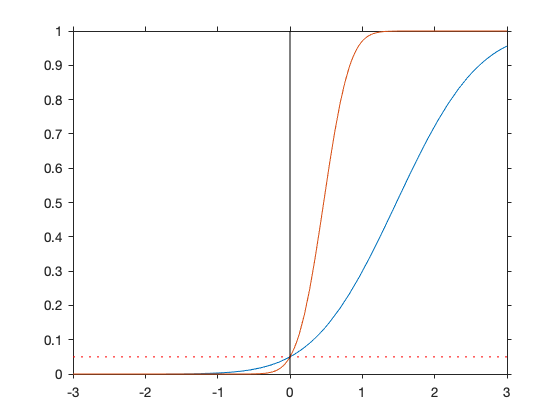

In [8]:
a0 = 0.05;
mu0 = 0;
sigma = 2;
n = 5;
pow_gauss_R = @(mu) 1 - normcdf(norminv(1-a0,0,1) + sqrt(n) .* (mu0 - mu) ./ sigma);
fplot(pow_gauss_R, [-3,3])
hold on
n = 50;
pow_gauss_R = @(mu) 1 - normcdf(norminv(1-a0,0,1) + sqrt(n) .* (mu0 - mu) ./ sigma);
fplot(pow_gauss_R, [-3,3])
hline(a0)
vline(0,'-k')
hold off

Compare $\sigma = 2$ with $\sigma = 4$.

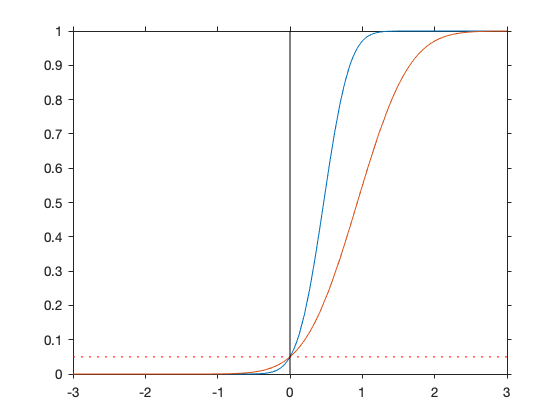

In [9]:
n = 50;
a0 = 0.05;
mu0 = 0;
sigma = 2;
pow_gauss_R = @(mu) 1 - normcdf(norminv(1-a0,0,1) + sqrt(n) .* (mu0 - mu) ./ sigma);
fplot(pow_gauss_R, [-3,3])
hold on
sigma = 4;
pow_gauss_R = @(mu) 1 - normcdf(norminv(1-a0,0,1) + sqrt(n) .* (mu0 - mu) ./ sigma);
fplot(pow_gauss_R, [-3,3])
hline(a0)
vline(0,'-k')
hold off


Compare $\alpha_0 = 0.05$ with $\alpha_0 = 0.10$.

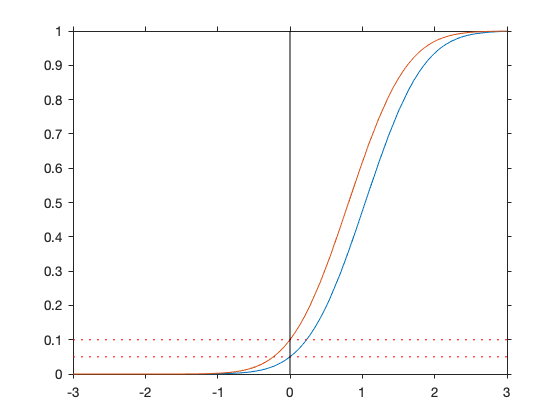

In [10]:
n = 10;
a0 = 0.05;
mu0 = 0;
sigma = 2;
pow_gauss_R = @(mu) 1 - normcdf(norminv(1-a0,0,1) + sqrt(n) .* (mu0 - mu) ./ sigma);
fplot(pow_gauss_R, [-3,3])
hold on
hline(a0)
a0 = 0.1;
pow_gauss_R = @(mu) 1 - normcdf(norminv(1-a0,0,1) + sqrt(n) .* (mu0 - mu) ./ sigma);
fplot(pow_gauss_R, [-3,3])
hline(a0)
vline(0, '-k')
hold off

### Example 4.16

Solution of the system to find the minimal sample size.

In [11]:
syms n positive
solve((n+1)/2 + 1.645 * sqrt(n)/2 - n *0.6 - 1/2 + 0.842 *sqrt(n*0.24), n)

ans =
((421*6^(1/2))/250 + 329/40)^2


In [12]:
eval(ans)

ans =
  152.5210


###  Example 4.18 Contaminated pool water

Transform $H_0: p_\mu \le 0.05$ where $p_\mu = P_\mu (X > 100)$ into $H_0': \mu \le 85.05$.

In [13]:

syms mu positive
fzero(@(mu) poissinv(0.95, mu) - 100.5, 50)

ans =
   85.0571


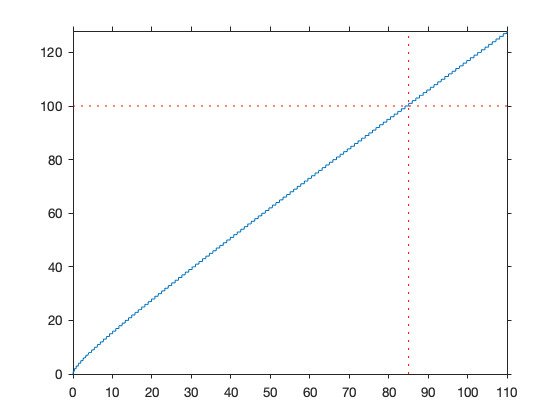

In [14]:

fplot(@(mu) poissinv(0.95, mu), [0, 110])
hline(100)
vline(85.0571)

### The t distribution

Figure 4.10. Densities of the t-distributions with 1 (blue), 5 (red), and $\infty$ degrees
of freedom. 

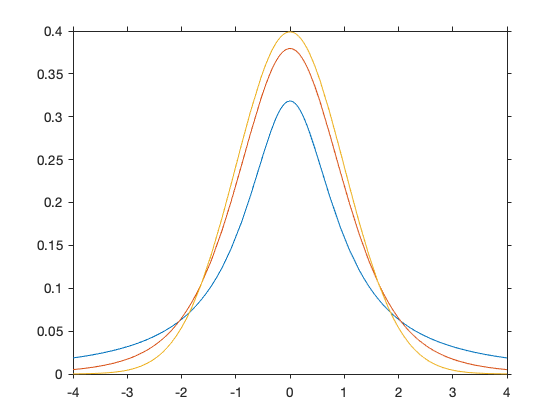

In [40]:
fplot(@(x) tpdf(x, 1), [-4, 4]); hold on 
fplot(@(x) tpdf(x, 5), [-4, 4]); 
fplot(@(x) normpdf(x), [-4, 4]); hold off

### Example from Altman
Daily intake in KJ for 11 women.

In [2]:
daily_intake = [5260,5470,5640,6180,6390,6515,6805,7515,7515,8230,8770];

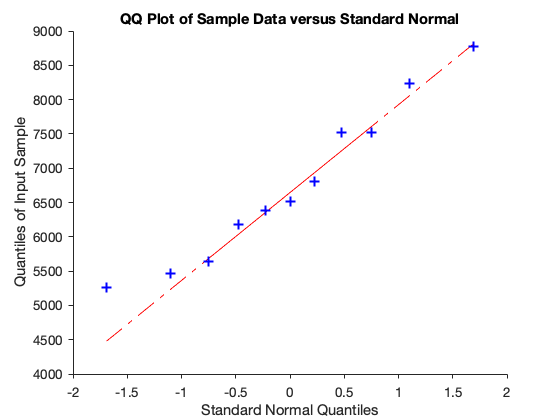

In [3]:
qqplot(daily_intake)

Test that $H_0: \mu \le 6000$ against $H_1: \mu > 6000$

In [4]:
[H, p, ~, stats] = ttest(daily_intake, 6000, 'tail', 'right')

H =
     1
p =
    0.0267
stats = 
  struct with fields:

    tstat: 2.1885
       df: 10
       sd: 1.1421e+03


In [5]:
sqrt(11) * (mean(daily_intake) - 6000)/std(daily_intake)

ans =
    2.1885


In [6]:
pval = 1-tcdf(2.1885,10)

pval =
    0.0267


In [7]:
pval_n = 1 - normcdf(2.1885)

pval_n =
    0.0143


### Example. Sign test
Sign test for the hypothesis $H_0 : \mu \le 6000$ where $\mu$ is now the median.

In [8]:
sign(daily_intake - 6000)

ans =
    -1    -1    -1     1     1     1     1     1     1     1     1


In [13]:
pval = 1-binocdf(7, 11, 1/2)

pval =
    0.1133


In [14]:
[p,H] = signtest(daily_intake, 6000,'tail','right')

p =
    0.1133
H =
  logical
   0


### Example 4.33 Student t test for paired samples
Example from Dobson. The weights, in kilograms, of twenty men before and after participation in a ‘waist loss’ program are considered (Egger et al., 1999) We want to know if, on average, they retain a weight loss twelve months after the program.

In [15]:
before = [100.8 102.0 105.9 108.0 92.0 116.7 110.2 135.0 123.5 95.0 ...
105.0 85.0 107.2 80.0 115.1 103.5 82.0 101.5 103.5 93.0]';
after = [
97.0 107.5 97.0 108.0 84.0 111.5 102.5 127.5 118.5 94.2 ...
105.0 82.4 98.2 83.6 115.0 103.0 80.0 101.5 102.6 93.0]';
XY = [before after]

XY =
  100.8000   97.0000
  102.0000  107.5000
  105.9000   97.0000
  108.0000  108.0000
   92.0000   84.0000
  116.7000  111.5000
  110.2000  102.5000
  135.0000  127.5000
  123.5000  118.5000
   95.0000   94.2000
  105.0000  105.0000
   85.0000   82.4000
  107.2000   98.2000
   80.0000   83.6000
  115.1000  115.0000
  103.5000  103.0000
   82.0000   80.0000
  101.5000  101.5000
  103.5000  102.6000
   93.0000   93.0000


H =
     1
p =
    0.0049
stats = 
  struct with fields:

    tstat: 2.8734
       df: 19
       sd: 4.1167


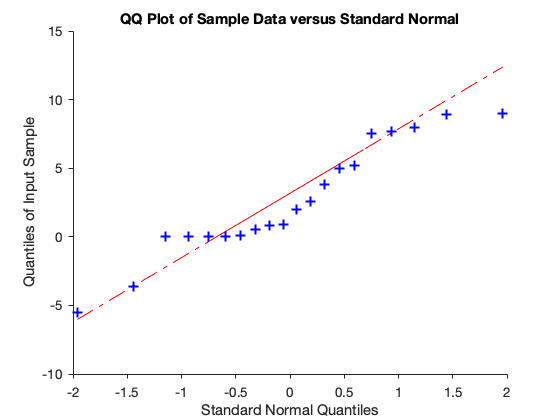

In [16]:
z = before - after; 
qqplot(z)
[H, p, ~, stats] = ttest(z, 0, 'tail', 'right')

Assuming normality there is a strong evidence against the null $H_0: \Delta \le 0$ because $p < 0.01$. Normality is however questionable. 

### Example  t-test for independend samples

Example from Maindonald. Consider data from an experiment in which 21 elastic bands were randomly divided into two groups, one of 10 and one of 11. Bands in the first group were immediately tested for the amount that they stretched under a weight of 1.35 kg. The other group were dunked in hot water at 65$\circ$ C for four minutes, then left at air temperature for ten minutes, and then tested for the amount that they stretched under the same 1.35 kg weight as before. 

ans =
  253.5000    9.9247
ans =
  244.0909   11.7342


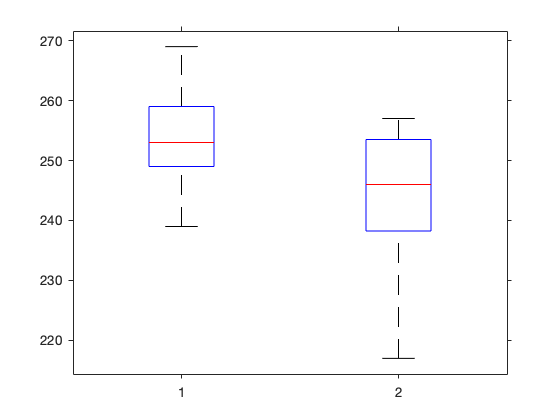

In [41]:
ambient= [254 252 239 240 250 256 267 249 259 269]'; 
heated= [233 252 237 246 255 244 248 242 217 257 254]'; 
[mean(ambient) std(ambient)]
[mean(heated) std(heated)]
boxplot([ambient; heated], [ones(10,1); ones(11,1)*2])

Is the difference of means significant (provided that the variances were equal)?

In [36]:
[H, p, ~ , st] = ttest2(ambient, heated, 'tail', 'both')

H =
     0
p =
    0.0632
st = 
  struct with fields:

    tstat: 1.9730
       df: 19
       sd: 10.9145


The difference is not significant (actually there is a borderline evidence against the null).

### Empirical Distribution function 

Figure 4.12. The empirical distribution function of a sample of size 25 from the $N(0, 1)$- distribution and the actual distribution function.


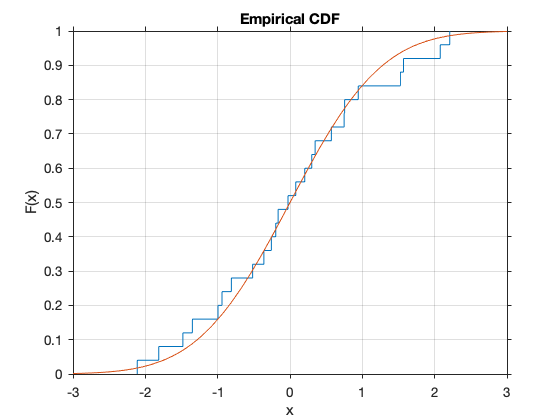

In [72]:
rng(204)
x = normrnd(zeros(25,1), ones(25,1));
cdfplot(x); hold on
fplot(@(x) normcdf(x), [-3,3])


### Kolmogorov Smirnov test
Data on grades (scale 0-100) on an exam. The a Kolmogorov-Smirnov test is applied for te null $H_0: F \sim F_0 = N(75,10)$. That is test the null hypothesis that the data comes from a normal distribution with a mean of 75 and a standard deviation of 10.  First data are standardized with respect to $\mu_0 = 75$ and $\sigma_0 = 10$ and the empirical distribution function is plotted against the standard normal.

In [96]:
load examgrades
test1 = grades(:,1);
[mean(test1) std(test1)]
x = (test1-75) ./ 10;

ans =
   75.0083    8.7202


In [97]:
[test1 x]

ans =
   65.0000   -1.0000
   61.0000   -1.4000
   81.0000    0.6000
   88.0000    1.3000
   69.0000   -0.6000
   89.0000    1.4000
   55.0000   -2.0000
   84.0000    0.9000
   86.0000    1.1000
   84.0000    0.9000
   71.0000   -0.4000
   81.0000    0.6000
   84.0000    0.9000
   81.0000    0.6000
   78.0000    0.3000
   67.0000   -0.8000
   96.0000    2.1000
   66.0000   -0.9000
   73.0000   -0.2000
   75.0000         0
   59.0000   -1.6000
   71.0000   -0.4000
   69.0000   -0.6000
   63.0000   -1.2000
   79.0000    0.4000
   76.0000    0.1000
   63.0000   -1.2000
   85.0000    1.0000
   87.0000    1.2000
   88.0000    1.3000
   80.0000    0.5000
   71.0000   -0.4000
   65.0000   -1.0000
   84.0000    0.9000
   71.0000   -0.4000
   75.0000         0
   81.0000    0.6000
   79.0000    0.4000
   64.0000   -1.1000
   65.0000   -1.0000
   84.0000    0.9000
   77.0000    0.2000
   70.0000   -0.5000
   75.0000         0
   84.0000    0.9000
   75.0000         0
   73.0000   -0.2000
   92.0

Current plot held


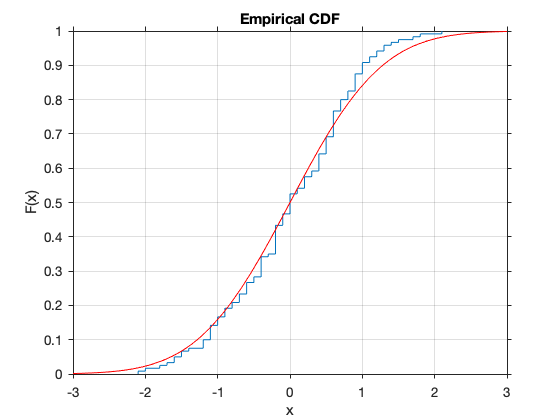

In [98]:
cdfplot(x); hold
fplot(@(x) normcdf(x), [-3,3], 'r-')

In [99]:
 [h,p,kstat] = kstest(x)

h =
  logical
   0
p =
    0.5612
kstat =
    0.0707


There is no evidence against the null.

### Likelihood ratio test

E simple example: assume that $X \sim Bin(100, p)$ and that we wand to test $H_0: p = 1/2$ against $H_1: p \ne 1/2$. The likelihood ratio statistic is 
$$
\lambda(X) = \frac{L(\hat p, X)}{L(p_0, X)}.
$$
We reject for large value of the statistic. Below you see the value of the statistic for $x = 60$.

In [106]:
n = 100; x = 60; phat = x/n; p0 = 1/2;
lambda = binopdf(x, n, phat) / binopdf(x, n, p0)

lambda =
    7.4899


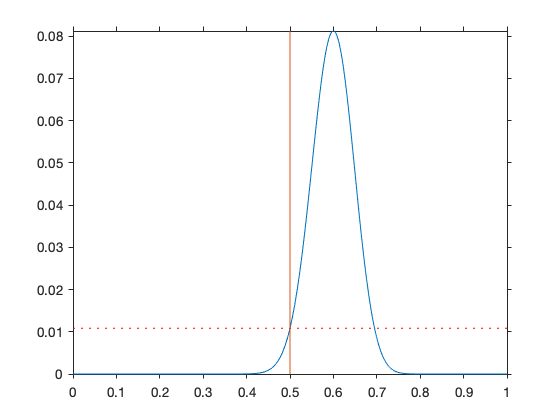

In [109]:
fplot(@(p) binopdf(x, n, p), [0,1])
vline(0.5, '-')
hline(binopdf(x, n, p0))